<a href="https://colab.research.google.com/github/Manikandan-professional/LoanApprovalPrediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

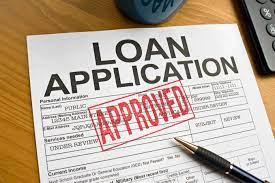

# **Importing the Necessary modules**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# **Conversion of csv to dataframe**

In [2]:
train='https://raw.githubusercontent.com/Manikandan-professional/Datasets/main/Training%20Dataset.csv'
test='https://raw.githubusercontent.com/Manikandan-professional/Datasets/main/Test%20Dataset.csv'
df_train=pd.DataFrame((pd.read_csv(train)))
df_test=pd.DataFrame((pd.read_csv(test)))
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Train Dataset**

# **Data Cleaning**

1. Since the Loan_ID is unique feature it has to be removed

In [3]:
df_train=df_train.drop(columns=['Loan_ID'])
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Number of Rows , Columns**

In [4]:
df_train.shape

(614, 12)

In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Null Value Identifier**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
#df_train=pd.get_dummies(df_train)

In [9]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Removing the Null Values**

In [10]:
df_train=df_train.dropna()

In [11]:
df_train=df_train.reset_index()

In [12]:
df_train

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df_train=df_train.iloc[:,1:]

In [14]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
le=LabelEncoder()

# **Gender Analysis**

In [16]:
print('The number of unique values in the gender column is:\n',df_train['Gender'].value_counts())

The number of unique values in the gender column is:
 Male      394
Female     86
Name: Gender, dtype: int64


In [17]:
df_train['Gender']=le.fit_transform(df_train['Gender'])

In [18]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
df_train['Gender']=df_train['Gender'].astype(int)

# **Married Analysis**

In [20]:
print('The number of unique values in the Married column is:\n',df_train['Gender'].value_counts())

The number of unique values in the Married column is:
 1    394
0     86
Name: Gender, dtype: int64


In [21]:
df_train['Married']=le.fit_transform(df_train['Married'])

In [22]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [23]:
df_train['Married']=df_train['Married'].astype(int)

# **Dependents Analysis**

In [24]:
print('The number of unique values in the Dependents column is:\n',df_train['Dependents'].value_counts())

The number of unique values in the Dependents column is:
 0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


In [25]:
for i in range(0,df_train.shape[0],1):
  if df_train['Dependents'][i]=='3+':
    df_train['Dependents'][i]='3'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df_train['Dependents']=le.fit_transform(df_train['Dependents'])

In [27]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [28]:
df_train['Married']=df_train['Married'].astype(int)

# **Education Analysis**

In [29]:
print('The number of unique values in the Education column is:\n',df_train['Education'].value_counts())

The number of unique values in the Education column is:
 Graduate        383
Not Graduate     97
Name: Education, dtype: int64


In [30]:
df_train['Education']=le.fit_transform(df_train['Education'])

In [31]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,1,2,0,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [32]:
df_train['Education']=df_train['Education'].astype(int)

# **Self_Employed Analysis**

In [33]:
print('The number of unique values in the Self_Employed column is:\n',df_train['Self_Employed'].value_counts())

The number of unique values in the Self_Employed column is:
 No     414
Yes     66
Name: Self_Employed, dtype: int64


In [34]:
df_train['Self_Employed']=le.fit_transform(df_train['Self_Employed'])

In [35]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [36]:
df_train['Self_Employed']=df_train['Self_Employed'].astype(int)

# **Self_Employed Analysis**

In [37]:
print('The number of unique values in the Self_Employed column is:\n',df_train['Self_Employed'].value_counts())

The number of unique values in the Self_Employed column is:
 0    414
1     66
Name: Self_Employed, dtype: int64


In [38]:
df_train['Self_Employed']=le.fit_transform(df_train['Self_Employed'])

In [39]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [40]:
df_train['Self_Employed']=df_train['Self_Employed'].astype(int)

# **Credit_History Analysis**

In [41]:
print('The number of unique values in the Credit_History column is:\n',df_train['Credit_History'].value_counts())

The number of unique values in the Credit_History column is:
 1.0    410
0.0     70
Name: Credit_History, dtype: int64


In [42]:
df_train['Credit_History']=le.fit_transform(df_train['Credit_History'])

In [43]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,Rural,N
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,Urban,Y
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,Urban,Y
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,Urban,Y
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1,Urban,Y


In [44]:
df_train['Credit_History']=df_train['Credit_History'].astype(int)

# **Property_Area Analysis**

In [45]:
print('The number of unique values in the Property_Area column is:\n',df_train['Property_Area'].value_counts())

The number of unique values in the Property_Area column is:
 Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


In [46]:
df_train['Property_Area']=le.fit_transform(df_train['Property_Area'])

In [47]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,N
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,Y
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,Y
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,Y
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,Y


In [48]:
df_train['Property_Area']=df_train['Property_Area'].astype(int)

# **Loan_Status Analysis**

In [49]:
print('The number of unique values in the Loan_Status column is:\n',df_train['Loan_Status'].value_counts())

The number of unique values in the Loan_Status column is:
 Y    332
N    148
Name: Loan_Status, dtype: int64


In [50]:
df_train['Loan_Status']=le.fit_transform(df_train['Loan_Status'])

In [51]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1


In [52]:
df_train['Loan_Status']=df_train['Loan_Status'].astype(int)

# **Test Dataset**

# **Data Cleaning**

In [53]:
df_test=df_test.drop(columns=['Loan_ID'])
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [54]:
df_test.shape

(367, 11)

In [55]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [57]:
df_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [58]:
#df_train=pd.get_dummies(df_train)

In [59]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [60]:
df_test=df_test.dropna()

In [61]:
df_test=df_test.reset_index()

In [62]:
df_test

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
284,361,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [63]:
df_test=df_test.iloc[:,1:]

In [64]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
284,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [65]:
le=LabelEncoder()

# **Gender Analysis**

In [66]:
print('The number of unique values in the gender column is:\n',df_test['Gender'].value_counts())

The number of unique values in the gender column is:
 Male      230
Female     59
Name: Gender, dtype: int64


In [67]:
df_test['Gender']=le.fit_transform(df_test['Gender'])

In [68]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,1,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,1,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,1,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [69]:
df_test['Gender']=df_test['Gender'].astype(int)

# **Married Analysis**

In [70]:
print('The number of unique values in the Married column is:\n',df_test['Gender'].value_counts())

The number of unique values in the Married column is:
 1    230
0     59
Name: Gender, dtype: int64


In [71]:
df_test['Married']=le.fit_transform(df_test['Married'])

In [72]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,1,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,1,1,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [73]:
df_test['Married']=df_test['Married'].astype(int)

# **Dependents Analysis**

In [74]:
print('The number of unique values in the Dependents column is:\n',df_test['Dependents'].value_counts())

The number of unique values in the Dependents column is:
 0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64


In [75]:
for i in range(0,df_test.shape[0],1):
  if df_test['Dependents'][i]=='3+':
    df_test['Dependents'][i]='3'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
df_test['Dependents']=le.fit_transform(df_test['Dependents'])

In [77]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,1,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,1,1,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [78]:
df_test['Married']=df_test['Married'].astype(int)

# **Education Analysis**

In [79]:
print('The number of unique values in the Education column is:\n',df_test['Education'].value_counts())

The number of unique values in the Education column is:
 Graduate        224
Not Graduate     65
Name: Education, dtype: int64


In [80]:
df_test['Education']=le.fit_transform(df_test['Education'])

In [81]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,No,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,0,No,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,0,No,5000,1800,208.0,360.0,1.0,Urban
3,1,0,0,1,No,3276,0,78.0,360.0,1.0,Urban
4,1,1,0,1,Yes,2165,3422,152.0,360.0,1.0,Urban


In [82]:
df_test['Education']=df_test['Education'].astype(int)

# **Self_Employed Analysis**

In [83]:
print('The number of unique values in the Self_Employed column is:\n',df_test['Self_Employed'].value_counts())

The number of unique values in the Self_Employed column is:
 No     257
Yes     32
Name: Self_Employed, dtype: int64


In [84]:
df_test['Self_Employed']=le.fit_transform(df_test['Self_Employed'])

In [85]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,Urban
3,1,0,0,1,0,3276,0,78.0,360.0,1.0,Urban
4,1,1,0,1,1,2165,3422,152.0,360.0,1.0,Urban


In [86]:
df_test['Self_Employed']=df_test['Self_Employed'].astype(int)

# **Self_Employed Analysis**

In [87]:
print('The number of unique values in the Self_Employed column is:\n',df_test['Self_Employed'].value_counts())

The number of unique values in the Self_Employed column is:
 0    257
1     32
Name: Self_Employed, dtype: int64


In [88]:
df_test['Self_Employed']=le.fit_transform(df_test['Self_Employed'])

In [89]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,Urban
3,1,0,0,1,0,3276,0,78.0,360.0,1.0,Urban
4,1,1,0,1,1,2165,3422,152.0,360.0,1.0,Urban


In [90]:
df_test['Self_Employed']=df_test['Self_Employed'].astype(int)

# **Credit_History Analysis**

In [91]:
print('The number of unique values in the Credit_History column is:\n',df_test['Credit_History'].value_counts())

The number of unique values in the Credit_History column is:
 1.0    243
0.0     46
Name: Credit_History, dtype: int64


In [92]:
df_test['Credit_History']=le.fit_transform(df_test['Credit_History'])

In [93]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,Urban
1,1,1,1,0,0,3076,1500,126.0,360.0,1,Urban
2,1,1,2,0,0,5000,1800,208.0,360.0,1,Urban
3,1,0,0,1,0,3276,0,78.0,360.0,1,Urban
4,1,1,0,1,1,2165,3422,152.0,360.0,1,Urban


In [94]:
df_test['Credit_History']=df_test['Credit_History'].astype(int)

# **Property_Area Analysis**

In [95]:
print('The number of unique values in the Property_Area column is:\n',df_test['Property_Area'].value_counts())

The number of unique values in the Property_Area column is:
 Urban        113
Rural         89
Semiurban     87
Name: Property_Area, dtype: int64


In [96]:
df_test['Property_Area']=le.fit_transform(df_test['Property_Area'])

In [97]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,1,0,0,1,0,3276,0,78.0,360.0,1,2
4,1,1,0,1,1,2165,3422,152.0,360.0,1,2


In [98]:
df_test['Property_Area']=df_test['Property_Area'].astype(int)

# **Machine Learning Model**

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [100]:
X=df_train.iloc[:,0:11].values
y=df_train.iloc[:,11:].values

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [102]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
pred=lr.predict(X_test)
#print('Accuracy',metrics.accuracy_score(y_test,pred))
print('r2 score',metrics.r2_score(y_test,pred))
print('mse',metrics.mean_squared_error(y_test,pred))


r2 score 0.22039427378489762
mse 0.1773603027139358


# **Logistic Regression**

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [105]:
X=df_train.iloc[:,0:11].values
y=df_train.iloc[:,11:].values

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [107]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [108]:
pred=lr.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,pred))
# print('r2 score',metrics.r2_score(y_test,pred))
# print('mse',metrics.mean_squared_error(y_test,pred))
print('Confution Matrix\n',metrics.confusion_matrix(y_test,pred))

Accuracy 0.775
Confution Matrix
 [[15 27]
 [ 0 78]]


# **XG Boost Classification**

In [109]:
from xgboost import XGBClassifier
from sklearn import metrics

In [110]:
X=df_train.iloc[:,0:11].values
y=df_train.iloc[:,11:].values

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [112]:
lr=XGBClassifier()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [113]:
pred=lr.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,pred))
# print('r2 score',metrics.r2_score(y_test,pred))
# print('mse',metrics.mean_squared_error(y_test,pred))
print('Confution Matrix\n',metrics.confusion_matrix(y_test,pred))

Accuracy 0.7166666666666667
Confution Matrix
 [[13 29]
 [ 5 73]]


# **In this Loan Approval case Study the best suitable model is Logistic Regression of accuracy 0.775**

In [114]:
!pip install flask.ngrok

In [115]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app=Flask(__name__)
run_with_ngrok(app)
@app.route('/')
def home_endpoint():
    return 'Hello World!'
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://924c-34-134-205-142.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [116]:
@app.route("/get_details")
def get_details():
  return "<h1>get of Flask on Google Colab!</h1>"
@app.route("/test")
def test():
  return "<h1>test of Flask on Google Colab!</h1>"

In [ ]:
from flask import Flask, render_template, request
from scipy.misc import imsave, imread, imresize
import numpy as np
import keras.models
import re
import sys
import os
from load import *

sys.path.append(os.path.abspath('./model'))
app = Flask(__name__)
global model, graph
model, graph = init()

def convertImage(imData):
    imgstr = re.search(r'base64(.*'.imData).group(1)
    with open('output.png', 'wb') as output:
        output.write(imgstr.decode('base64'))

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    imData = request.get_data()
    convertImage(imData)
    x = imread('output.png', mode = 'L')
    x = np.invert(x)
    x = imresize(x, 48, 48)
    x = x.reshape(1,48,48,1)
    with graph.as_default():
        out = model.predict(x)
        response = np.array_str(np.argmax(out))
        return response



if __name__ == "__main__":
    port = int(os.environ.get('PORT', 5000))
    app.run(host='0.0.0.0', port=port)

In [ ]:
# Serve model as a flask application

import pickle
import numpy as np
from flask import Flask, request

model = None
app = Flask(__name__)


# def load_model():
#     global model
#     # model variable refers to the global variable
#     with open('iris_trained_model.pkl', 'rb') as f:
#         model = pickle.load(f)


@app.route('/')
def home_endpoint():
    return 'Hello World!'


@app.route('/predict', methods=['POST'])
def get_prediction():
    # Works only for a single sample
    if request.method == 'POST':
        data = request.get_json()  # Get data posted as a json
        data = np.array(data)[np.newaxis, :]  # converts shape from (4,) to (1, 4)
        prediction = model.predict(data)  # runs globally loaded model on the data
    return str(prediction[0])


if __name__ == '__main__':
    # load_model()  # load model at the beginning once only
    app.run(host='127.0.0.1')